# 分类 Fashion-MNIST 数据集

现在轮到你来构建一个神经网络了。你将使用的是 [Fashion-MNIST 数据集](https://github.com/zalandoresearch/fashion-mnist)，这是 MNIST 数据集的替代品。对于神经网络而言，原始的 MNIST 数据集体量太小，因而你可以轻易达到 97% 以上的准确率。而 Fashion-MNIST 数据集是一组有关衣物的 28x28 灰阶图像。这个数据集比 MNIST 复杂得多，因此你能更好地判断神经网络的性能，它也更加接近你在现实世界中使用的数据集。

<img src='assets/fashion-mnist-sprite.png' width=500px>

在这个 notebook 中，你将构建专属于你的神经网络。在大多数情况下，你可以直接复制粘贴第三部分的代码，但这样一来你很难学到知识。因此我们推荐你自己编写代码来运行程序，这十分重要。不过在完成这个任务时，你也可以随时查阅和参考之前的 notebook。

首先，我们通过 torchvision 来加载数据集。

In [26]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

在这里，我们能看到其中一张图片。

torch.Size([64, 1, 28, 28])


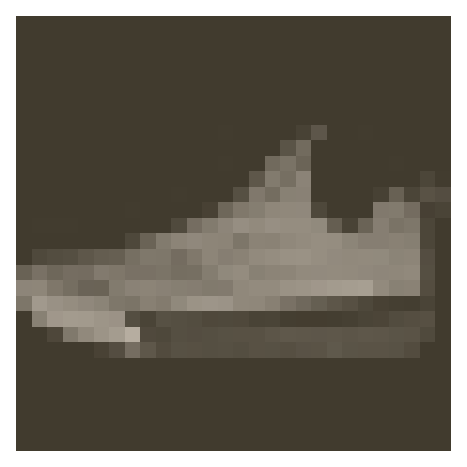

In [36]:
image, label = next(iter(trainloader))
print(image.size())
helper.imshow(image[0,:]);

在加载数据之后，我们应该导入一些必要的包了。

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms

import helper

## 构建网络

在这里，你应该定义你的网络。如同 MNIST 数据集一样，这里的每张图片的像素为 28x28，共有 784 个像素点和 10 个类。你至少需要添加一个隐藏层。对于这些层，我们推荐你使用 ReLU 激活函数，并通过前向传播来返回 logits。层的数量和大小都由你来决定。

In [40]:
# TODO: Define your network architecture here
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        
        return x
    
    def predict(self, x):
        logits = self.forward(x)
        return F.softmax(logits, dim=1)

# 训练网络

现在，你应该构建你的网络并训练它了。首先，你需要定义[条件](http://pytorch.org/docs/master/nn.html#loss-functions)（比如 `nn.CrossEntropyLoss`）以及[优化器](http://pytorch.org/docs/master/optim.html)（比如 `optim.SGD` 或 `optim.Adam`）。

接着，你需要编写训练代码。请记住，训练传播是一个十分简明的过程：

* 在网络中进行前向传播来获取 logits 
* 使用 logits 来计算损失
* 使用 `loss.backward()` 在网络中进行后向传播来计算梯度
* 使用优化器执行一个学习步来更新权重

通过调整超参数（隐藏单元、学习速率等），你应该可以将训练损失控制在 0.4 以下。

In [41]:
# TODO: Create the network, define the criterion and optimizer
net = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [45]:
# TODO: Train the network here
# dataiter = iter(trainloader)
# images, labels = dataiter.next()

# images.resize_(64, 784)

# inputs = Variable(images)
# targets = Variable(labels)

# optimizer.zero_grad()

# output = net.forward(inputs)
# loss = criterion(output, targets)
# loss.backward()
# optimizer.step()

epochs = 1
steps = 0
running_loss = 0
print_every = 20

for e in range(epochs):
    for images, labels in iter(trainloader):
        steps += 1
        
        images.resize_(images.size()[0], 784)
        
        inputs = Variable(images)
        targets = Variable(labels)
        optimizer.zero_grad()
        
        output = net.forward(inputs)
        loss = criterion(output, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        
        if steps % print_every == 0:
            # Test accuracy
            accuracy = 0
            for ii, (images, labels) in enumerate(testloader):
                
                images = images.resize_(images.size()[0], 784)
                inputs = Variable(images, volatile=True)
                
                predicted = net.predict(inputs).data
                equality = (labels == predicted.max(1)[1])
                accuracy += equality.type_as(torch.FloatTensor()).mean()
            
            print("Epoch: {}/{}".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every),
                  "Test accuracy: {:.4f}".format(accuracy/(ii+1)))
            running_loss = 0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Epoch: 1/1 Loss: 1.6392 Test accuracy: 0.6584
Epoch: 1/1 Loss: 1.1843 Test accuracy: 0.6897
Epoch: 1/1 Loss: 1.0090 Test accuracy: 0.7068
Epoch: 1/1 Loss: 0.9340 Test accuracy: 0.7136
Epoch: 1/1 Loss: 0.8620 Test accuracy: 0.7272
Epoch: 1/1 Loss: 0.8278 Test accuracy: 0.7352
Epoch: 1/1 Loss: 0.7755 Test accuracy: 0.7342
Epoch: 1/1 Loss: 0.8242 Test accuracy: 0.7410
Epoch: 1/1 Loss: 0.7380 Test accuracy: 0.7486
Epoch: 1/1 Loss: 0.7275 Test accuracy: 0.7514
Epoch: 1/1 Loss: 0.6986 Test accuracy: 0.7545
Epoch: 1/1 Loss: 0.6735 Test accuracy: 0.7615
Epoch: 1/1 Loss: 0.6611 Test accuracy: 0.7673
Epoch: 1/1 Loss: 0.6874 Test accuracy: 0.7677
Epoch: 1/1 Loss: 0.6907 Test accuracy: 0.7702
Epoch: 1/1 Loss: 0.6984 Test accuracy: 0.7727
Epoch: 1/1 Loss: 0.6606 Test accuracy: 0.7758
Epoch: 1/1 Loss: 0.6240 Test accuracy: 0.7721
Epoch: 1/1 Loss: 0.6190 Test accuracy: 0.7759
Epoch: 1/1 Loss: 0.6100 Test accuracy: 0.7789
Epoch: 1/1 Loss: 0.6348 Test accuracy: 0.7787
Epoch: 1/1 Loss: 0.6228 Test accur

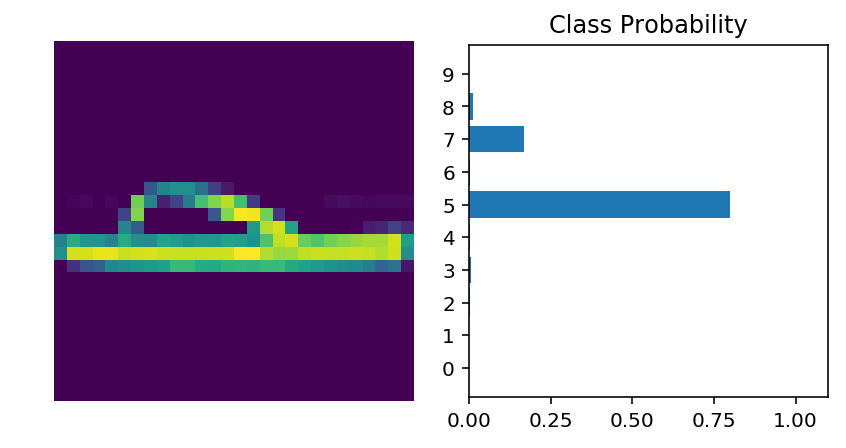

In [46]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = net.predict(Variable(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps)

训练好神经网络之后，你应该希望保存这个网络以便下次加载，而不是重新训练。很明显，每次使用时都重新训练网络并不现实。在实际操作中，你将会在训练网络之后将模型保存，接着重新加载网络以进行训练或是预测。在下一部分，我将为你展示如何保存和加载训练好的模型。